In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from llm_judge_reporting.calibration import point_estimator, confidence_interval


matplotlib.rcParams['mathtext.fontset'] = 'dejavusans'
plt.rcParams.update({"font.size": 18})
legend_font_size = 14

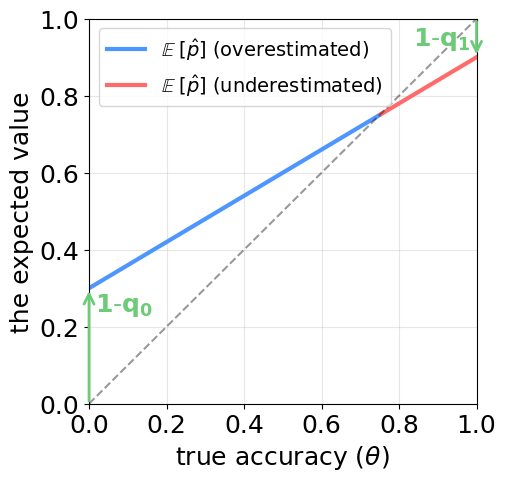

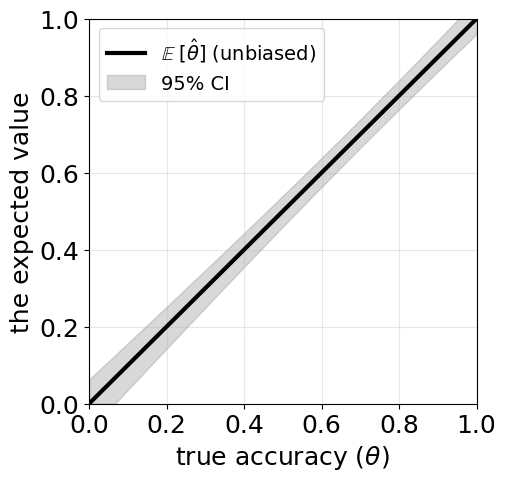

In [2]:
# parameters
q0 = 0.7
q1 = 0.9

# sample size
n = int(1e9)
m0 = 500
m1 = 500

########################################################
theta = np.linspace(0, 1, 200)
p = (q0 + q1 - 1) * theta + (1 - q0)
turning_point = (1-q0) / (2-q0-q1)

plt.figure(figsize=(5, 5))

plt.plot(theta[theta <= turning_point], p[theta <= turning_point], color='#4D96FF', linewidth=3,
         label=r'$\mathbb{E}\;[\hat{p}]$ (overestimated)')
plt.plot(theta[theta > turning_point], p[theta > turning_point], color='#FF6B6B', linewidth=3,
         label=r'$\mathbb{E}\;[\hat{p}]$ (underestimated)')

plt.axline((0, 0), slope=1, color='black', alpha=0.4, linestyle='--')

plt.annotate('', xy=(0, 1-q0), xytext=(0, 0), color='#6BCB77',
             arrowprops=dict(arrowstyle='->', linewidth=2, color='#6BCB77'))
plt.text(0.015, 0.24, r'$\mathbf{1}$-$\mathbf{q_0}$', color='#6BCB77', ha='left')

plt.annotate('', xy=(1, q1), xytext=(1, 1), color='#6BCB77',
             arrowprops=dict(arrowstyle='->', linewidth=2, color='#6BCB77'))
plt.text(0.835, 0.93, r'$\mathbf{1}$-$\mathbf{q_1}$', color='#6BCB77', ha='left')

plt.xlim(0, 1); plt.ylim(0, 1)
plt.xlabel(r"true accuracy ($\theta$)")
plt.ylabel(r"the expected value")
plt.legend(prop={'size': legend_font_size})
plt.grid(alpha=0.3)

plt.show()
plt.close()

########################################################
theta_hats = []
ci_lows = []
ci_highs = []
for p_temp in p:
    theta_hat = point_estimator(p_temp, q0, q1)
    ci_low, ci_high = confidence_interval(p_temp, q0, q1, n, m0, m1, alpha=0.05)
    theta_hats.append(theta_hat)
    ci_lows.append(ci_low)
    ci_highs.append(ci_high)

plt.figure(figsize=(5, 5))

plt.plot(theta, theta_hats, linewidth=3, color='black', label=r'$\mathbb{E}\;[\hat{\theta}]$ (unbiased)')
plt.fill_between(theta, ci_lows, ci_highs, color='gray', alpha=0.3, label='95% CI')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(r"true accuracy ($\theta$)")
plt.ylabel(r"the expected value")
plt.legend(prop={'size': legend_font_size})
plt.grid(alpha=0.3)

plt.show()
plt.close()